In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('BerlinCrime.csv')

In [3]:
df

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,...,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Sum
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,...,328,120,68,16,4,273,26,171,1032,5333
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,...,307,170,37,10,4,380,124,98,870,6046
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,...,792,822,275,49,27,1538,522,435,3108,19314
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,...,192,396,131,14,5,428,122,213,752,4712
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,...,410,325,161,42,22,516,64,259,1403,6960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019,Reinickendorf,123012,Nord 2 - Waidmannslust/Wittenau/Lübars,34,19,372,85,123,1160,...,135,150,93,16,3,306,74,110,728,3438
1196,2019,Reinickendorf,123021,MV 1 - Märkisches Viertel,42,22,491,123,187,1100,...,224,76,40,39,19,286,11,73,986,3770
1197,2019,Reinickendorf,123022,MV 2 - Rollbergsiedlung,6,4,84,19,34,293,...,36,18,34,5,2,156,56,21,212,993
1198,2019,Reinickendorf,123043,West 3 - Borsigwalde/Freie Scholle,8,4,95,18,43,492,...,96,69,38,6,1,79,8,31,218,1227


In [4]:
# Counts of each crime in each district
#district_overview  = df.groupby(df['District']).sum()
district_overview  = df.groupby('District', as_index=False).sum()
district_overview.drop(['Year', 'Code'], axis=1, inplace=True)
district_overview = district_overview.sort_values('Sum')
district_overview= district_overview.reset_index(drop=True)

In [5]:
district_overview

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Sum
0,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019
1,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173
2,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582
3,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033
4,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785
5,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585
6,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459
7,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058
8,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786
9,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618


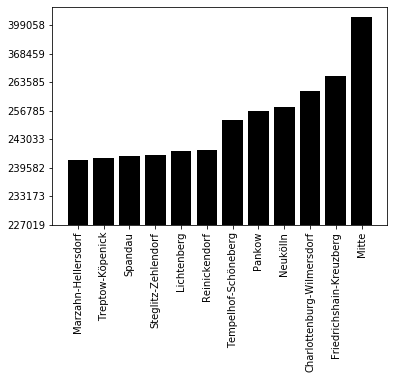

In [6]:
fig, ax = plt.subplots()
ax.bar(district_overview['District'],
        district_overview['Sum'],
        color='black')
ax.set_xticklabels(district_overview['District'], rotation=90)
ax.set_yticklabels(district_overview['Sum'])
plt.show()

In [7]:
#normalizing the data by the area of the districts

Areas = []

Areas = Areas.append({'Charlottenburg-Wilmersdorf': '64.72','Friedrichshain-Kreuzberg':'20.16', 'Lichtenberg':'52.29',
          'Marzahn-Hellersdorf': '61.74','Mitte':'39.47','Neukölln':'44.93',
          'Pankow':'103.01','Reinickendorf':'89.46','Spandau':'91.91','Steglitz-Zehlendorf':'102.50',
          'Tempelhof-Schöneberg': '53.09', 'Treptow-Köpenick':'168.42'})

In [8]:
AreasD = pd.DataFrame(Areas)


In [9]:
Areas = [{'Charlottenburg-Wilmersdorf': '64.72','Friedrichshain-Kreuzberg':'20.16', 'Lichtenberg':'52.29',
          'Marzahn-Hellersdorf': '61.74','Mitte':'39.47','Neukölln':'44.93',
          'Pankow':'103.01','Reinickendorf':'89.46','Spandau':'91.91','Steglitz-Zehlendorf':'102.50',
          'Tempelhof-Schöneberg': '53.09', 'Treptow-Köpenick':'168.42'}]
Areasdf = pd.DataFrame(Areas)
Areasdf = Areasdf.T
Areasdf.columns = ['Area']
Areasdf = Areasdf.reset_index(drop=False)
Areasdf.columns= ['District','Area']
Areasdf

,District,Area
0,Charlottenburg-Wilmersdorf,64.72
1,Friedrichshain-Kreuzberg,20.16
2,Lichtenberg,52.29
3,Marzahn-Hellersdorf,61.74
4,Mitte,39.47
5,Neukölln,44.93
6,Pankow,103.01
7,Reinickendorf,89.46
8,Spandau,91.91
9,Steglitz-Zehlendorf,102.50


In [31]:
DO = pd.merge(district_overview, Areasdf, on='District')
DO

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Sum,Area
0,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019,61.74
1,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173,168.42
2,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582,91.91
3,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033,102.50
4,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785,52.29
5,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585,89.46
6,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459,53.09
7,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058,103.01
8,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786,44.93
9,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618,64.72


In [54]:
#DO['Crime_per_sqm']= DO['Sum']/ DO['Area']
#DO.assign(Crime_per_sqm = DO['Sum']/ DO['Area'])
#DO.assign(Crime_per_sqm = ['Sum']/ ['Area])
DO.Sum = DO.Sum.astype(float)
DO.Area = DO.Area.astype(float)
DO = DO.assign(Crime_per_sqm = DO.Sum /DO.Area)
DO.Crime_per_sqm = DO.Crime_per_sqm.astype(float)
DO = DO.assign(Crime_per_sqm = DO.Sum /DO.Area)
DO.Crime_per_sqm  = DO.Crime_per_sqm.round(1)



DO

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Sum,Area,Crime_per_sqm
0,Marzahn-Hellersdorf,1981,1090,24198,4576,7330,76041,4500,13861,8295,3735,1651,532,22738,4714,3086,48691,227019.0,61.74,3677.0
1,Treptow-Köpenick,1571,859,16893,3681,6080,90453,4241,15510,16758,4346,1274,592,21778,5576,3633,39928,233173.0,168.42,1384.5
2,Spandau,2314,1193,22670,5318,8378,89812,2590,13146,8555,4396,1348,544,20004,2796,4163,52355,239582.0,91.91,2606.7
3,Steglitz-Zehlendorf,1624,794,13871,2720,6476,101487,3901,19679,16389,8247,1144,431,20879,5108,3116,37167,243033.0,102.50,2371.1
4,Lichtenberg,1890,1057,21001,4525,6431,99402,5251,17003,13868,4445,1439,572,22543,5046,3530,48782,256785.0,52.29,4910.8
5,Reinickendorf,2385,1171,22514,5333,9137,99013,2754,18202,9876,6784,1354,516,20899,4022,7300,52325,263585.0,89.46,2946.4
6,Tempelhof-Schöneberg,3525,1906,25880,5930,9872,153141,4281,23861,20791,7536,1665,602,27722,5723,8965,67059,368459.0,53.09,6940.3
7,Pankow,2581,1304,23057,5409,8165,167927,5732,22013,34665,7911,1654,661,33486,9701,4832,69960,399058.0,103.01,3874.0
8,Neukölln,4659,2545,32239,9261,11477,161622,4083,25428,15568,8861,1903,854,32975,5321,12253,82737,411786.0,44.93,9165.1
9,Charlottenburg-Wilmersdorf,4220,2039,31931,7797,11380,210033,5821,32476,26447,10606,1313,593,29329,6364,8425,80844,469618.0,64.72,7256.1


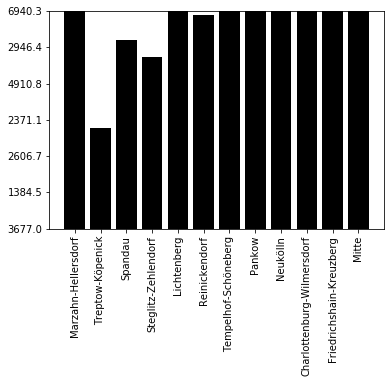

In [57]:
fig, ax = plt.subplots()
ax.bar(DO['District'],
        DO['Crime_per_sqm'],
        color='black')
ax.set_xticklabels(DO['District'], rotation=90)
ax.set_yticklabels(DO['Crime_per_sqm'])
ax.set_ylim([0,3000])
plt.show()

In [16]:
# finding correlations
district_overview.corr()


,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Sum
Robbery,1.000000,0.989304,0.935258,0.983901,0.842566,0.917086,-0.011637,0.768177,0.681047,0.579243,0.867457,0.837846,0.928014,0.736813,0.947453,0.949342,0.945052
Street_robbery,0.989304,1.000000,0.899093,0.968191,0.762944,0.869061,-0.052082,0.682888,0.667715,0.483433,0.879169,0.820566,0.917418,0.744531,0.978718,0.904574,0.904785
Injury,0.935258,0.899093,1.000000,0.971632,0.929051,0.920827,0.033719,0.764536,0.596870,0.527263,0.875936,0.835222,0.883272,0.692697,0.829560,0.966129,0.938125
Agg_assault,0.983901,0.968191,0.971632,1.000000,0.874066,0.912477,-0.032884,0.737230,0.635915,0.524420,0.891710,0.872283,0.920134,0.722893,0.921861,0.962010,0.941075
Threat,0.842566,0.762944,0.929051,0.874066,1.000000,0.886452,0.005762,0.849380,0.506254,0.703881,0.733384,0.769413,0.773676,0.533661,0.662384,0.929055,0.887666
Theft,0.917086,0.869061,0.920827,0.912477,0.886452,1.000000,0.237763,0.906880,0.826982,0.737744,0.770600,0.788222,0.933431,0.830737,0.800059,0.964322,0.995294
Car,-0.011637,-0.052082,0.033719,-0.032884,0.005762,0.237763,1.000000,0.382842,0.469238,0.296875,0.013803,0.108782,0.224799,0.376652,-0.153870,0.145394,0.206970
From_car,0.768177,0.682888,0.764536,0.737230,0.849380,0.906880,0.382842,1.000000,0.716262,0.914887,0.541833,0.648068,0.768407,0.639179,0.579777,0.848392,0.884668
Bike,0.681047,0.667715,0.596870,0.635915,0.506254,0.826982,0.469238,0.716262,1.000000,0.617459,0.573436,0.584452,0.846108,0.946065,0.643128,0.721130,0.816089
Burglary,0.579243,0.483433,0.527263,0.524420,0.703881,0.737744,0.296875,0.914887,0.617459,1.000000,0.315129,0.454474,0.593657,0.485533,0.395688,0.660148,0.707591


In [ ]:
#district_overview.loc[:,'Total'] = district_overview.sum(axis=1)
#district_overview.append(district_overview.sum().rename('AllCrimes')).assign(AllCrimes=lambda d: d.sum(1))
#do = district_overview.append(district_overview.sum().rename('AllCrimes')).assign(AllCrimes=lambda d: d.sum(1))
#do = do.reset_index(drop=True, inplace=True)
#district_overview.loc[district_overview['Robbery'] == district_overview['Robbery'].max()] 